In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [2]:
import tensorflow
mnist=tensorflow.keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


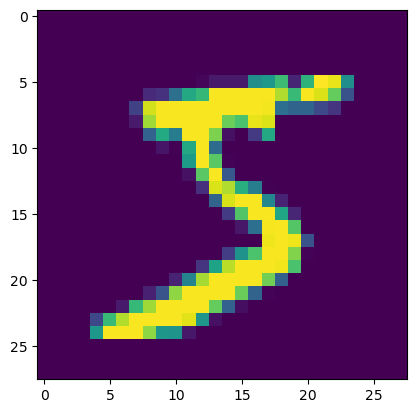

In [6]:
plt.imshow(X_train[0])
print(y_train[0])

In [7]:
X_train,X_test=X_train/255,X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
K=len(set(y_train))
print(K)

10


In [10]:
X_train[0].shape

(28, 28)

In [11]:
i=Input(shape=X_train[0].shape)
x=LSTM(128,return_sequences=True)(i)
x=GlobalMaxPooling1D()(x)
x=Dense(K,activation='softmax')(x)
model=Model(i,x)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 0.2088 - accuracy: 0.9361 - val_loss: 0.0909 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0853 - accuracy: 0.9746 - val_loss: 0.0838 - val_accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.0714 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0720 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0634 - accuracy: 0.9803 - val_loss: 0.0652 - val_accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0791 - val_accuracy: 0.9751
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0642 - val_ac

<AxesSubplot: >

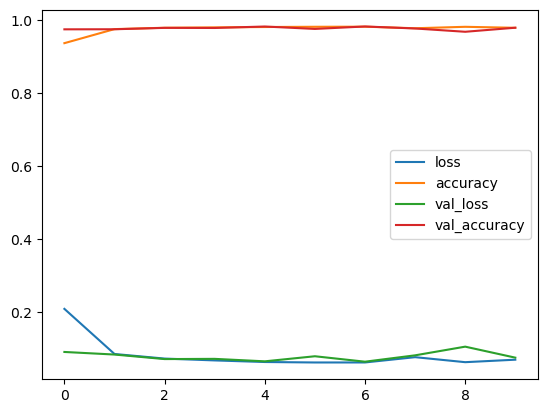

In [13]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [14]:
predictions=model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 4ms/step


Text(50.722222222222214, 0.5, 'truelabel')

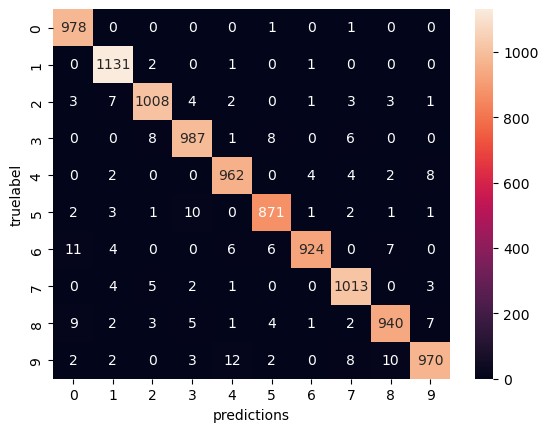

In [15]:
cm=tensorflow.math.confusion_matrix(labels=y_test,predictions=predictions)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predictions')
plt.ylabel('truelabel')

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0753 - accuracy: 0.9784


[0.07526247203350067, 0.9783999919891357]

true label 3 ,predicted 7


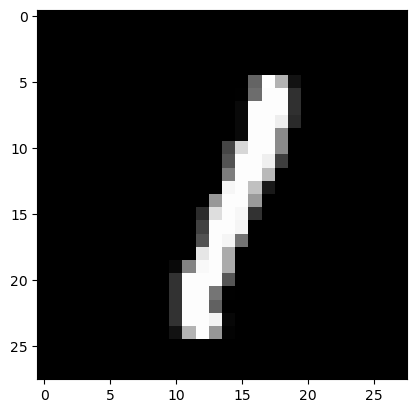

In [17]:
misclassified_idx=np.where(predictions!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_train[i],cmap='gray')
print('true label %s ,predicted %s' % (y_test[i],predictions[i]))